# 2020-01-17 Voltage measurement of the zener diodes


- Zeners connected in reverse direction
- Zeners are all on one PVC piece
- 800 MMOhm resistors behind target and voltage divider using a 21.5 kOhm resistor
- Current over the 21.5 kOhm resistor is measured with a voltage meter


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# high voltage power supply measurements
# high voltage in kV
V_HV = [
    10,
    14.7,
    19.9,
    24.9,
    29.9,
    34.9,
    39.9,
    49.9,
    59.9,
    69.9,
    79.9,
    85,
    90,
    100
]
# current in mA
I_HV = [
    0.01,
    0.01,
    0.02,
    0.03,
    0.03,
    0.04,
    0.04,
    0.06,
    0.07,
    0.10,
    0.13,
    0.15,
    0.16,
    0.21
]

# Volt 
V_Voltmeter = [
    0.233,
    0.364,
    0.506,
    0.643,
    0.780,
    0.917,
    1.053,
    1.369,
    1.690,
    2.012,
    2.593,
    2.832,
    3.018,
    0
]

# resistors
# 8x 100 MOhm circuit
R1 = 800 * 1e6 # Ohm
# 22 kOhm for measurement, voltage divider
R2 = 21.5 * 1e3 # Ohm

# return expected voltage read by multimeter for a HV of x
f_expected_voltage = lambda x: x * R2 / (R1 + R2) # Units of x

# return target voltage in kV measured over the resistor
f_target_voltage = lambda x: x * (R1 + R2) / R2 # Units of x


# Zener diodes 
# 200 V per diode, 7 diodes
V_zener = 1.4 # kV

# expected voltage read by multimeter
# adjust voltage input to voltage dropped after zener
V_HV_after_zener = [V-V_zener for V in V_HV]
V_expected = [f_expected_voltage(V*1000) for V in V_HV_after_zener] # convert kV to V
V_meas_target = [f_target_voltage(V)/1000 for V in V_Voltmeter] # convert kV to V

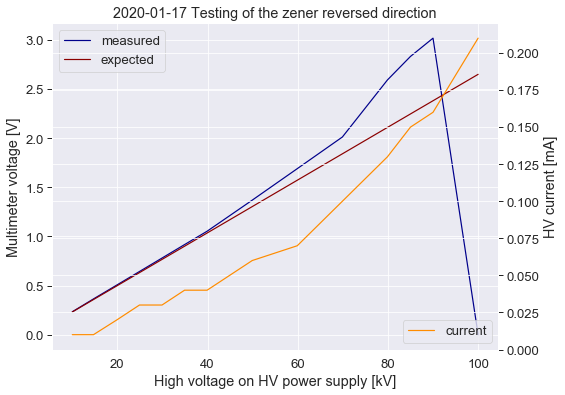

In [16]:
# plots
sns.set(font_scale=1.5, context="paper")
fig, ax = plt.subplots(figsize=(8,6))
plt.title("2020-01-17 Testing of the zener reversed direction")
plt.plot(V_HV, V_Voltmeter, label='measured', color='darkblue')
plt.plot(V_HV, V_expected, label='expected', color='darkred')
_ = plt.xlabel('High voltage on HV power supply [kV]')
_ = plt.ylabel('Multimeter voltage [V]')
_ = plt.legend(loc='best')

ax2 = ax.twinx()
ax2.plot(V_HV, I_HV, label='current', color='darkorange')
_ = plt.legend(loc='lower right')

_ = plt.ylabel('HV current [mA]')


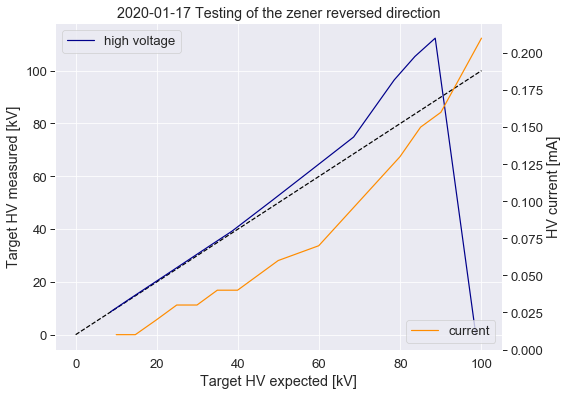

In [25]:
# plots
sns.set(font_scale=1.5, context="paper")
fig, ax = plt.subplots(figsize=(8,6))
plt.title("2020-01-17 Testing of the zener reversed direction")
# plt.plot(V_HV, , label='expected', color='darkred')
plt.plot([0, 100], [0, 100], '--', color='black')
plt.plot(np.asarray(V_HV)-1.4, V_meas_target, label='high voltage', color='darkblue')
_ = plt.xlabel('Target HV expected [kV]')
_ = plt.ylabel('Target HV measured [kV]')
_ = plt.legend(loc='best')

ax2 = ax.twinx()
# Turns off grid on the secondary (right) Axis.
ax2.grid(False)
ax2.plot(V_HV, I_HV, label='current', color='darkorange')
_ = plt.legend(loc='lower right')

_ = plt.ylabel('HV current [mA]')


# 2020-01-22 Verify that the reversed direction is ok

- cut pieces of the PVC 
- other multimeter
- data for the not reversed direction is lost, but was evident

## not reversed direction

In [53]:
# high voltage power supply measurements
# high voltage in kV
V_HV = [10,20,30,40,50,100,95,90,85
]

# Volt 
V_Voltmeter = [
0.274,0.550,0.827,1.116,1.429,3.57,3.34,3.06,2.83
]
# current in mA
I_HV = [
0.01,0.02,0.04,0.05,0.07,0.25,0.22,0.20,0.18
]
# resistors
# 8x 100 MOhm circuit
R1 = 800 * 1e6 # Ohm
# 22 kOhm for measurement, voltage divider
R2 = 21.5 * 1e3 # Ohm

# return expected voltage read by multimeter for a HV of x
f_expected_voltage = lambda x: x * R2 / (R1 + R2) # Units of x

# return target voltage in kV measured over the resistor
f_target_voltage = lambda x: x * (R1 + R2) / R2 # Units of x


# Zener diodes 
# 200 V per diode, 7 diodes
V_zener = 1.4 # kV

# expected voltage read by multimeter
# adjust voltage input to voltage dropped after zener
V_HV_after_zener = [V-V_zener for V in V_HV]
V_expected = [f_expected_voltage(V*1000) for V in V_HV_after_zener] # convert kV to V
V_meas_target = [f_target_voltage(V)/1000 for V in V_Voltmeter] # convert kV to V



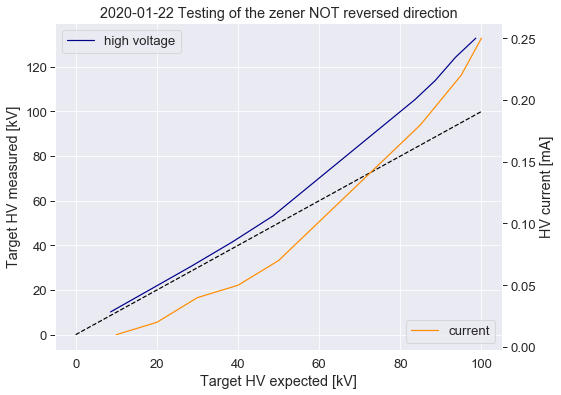

In [55]:
V_HV = np.sort(np.asarray(V_HV))
V_meas_target = np.sort(np.asarray(V_meas_target))
I_HV = np.sort(np.asarray(I_HV))

# plots
sns.set(font_scale=1.5, context="paper")
fig, ax = plt.subplots(figsize=(8,6))
plt.title("2020-01-22 Testing of the zener NOT reversed direction")
# plt.plot(V_HV, , label='expected', color='darkred')
plt.plot([0, 100], [0, 100], '--', color='black')
plt.plot(np.asarray(V_HV)-1.4, V_meas_target, label='high voltage', color='darkblue')
_ = plt.xlabel('Target HV expected [kV]')
_ = plt.ylabel('Target HV measured [kV]')
_ = plt.legend(loc='best')

ax2 = ax.twinx()

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)
ax2.plot(V_HV, I_HV, label='current', color='darkorange')
_ = plt.legend(loc='lower right')

_ = plt.ylabel('HV current [mA]')


In [51]:
# high voltage power supply measurements
# high voltage in kV
V_HV = [
10,
20,
30,
40,
50,
60,
70,
80,
90,
100,
105,
110
]

# Volt 
V_Voltmeter = [
0.1,
0.4,
0.6,
0.9,
1.2,
1.6,
1.9,
2.3,
2.8,
3.4,
3.7,
4.1
]
# current in mA
I_HV = [
0.01,0.02,0.03,0.05,0.06,0.08,0.10,0.12,0.15,0.2,0.23,0.26
]
# resistors
# 8x 100 MOhm circuit
R1 = 800 * 1e6 # Ohm
# 22 kOhm for measurement, voltage divider
R2 = 21.5 * 1e3 # Ohm

# return expected voltage read by multimeter for a HV of x
f_expected_voltage = lambda x: x * R2 / (R1 + R2) # Units of x

# return target voltage in kV measured over the resistor
f_target_voltage = lambda x: x * (R1 + R2) / R2 # Units of x


# Zener diodes 
# 200 V per diode, 7 diodes
V_zener = 1.4 # kV

# expected voltage read by multimeter
# adjust voltage input to voltage dropped after zener
V_HV_after_zener = [V-V_zener for V in V_HV]
V_expected = [f_expected_voltage(V*1000) for V in V_HV_after_zener] # convert kV to V
V_meas_target = [f_target_voltage(V)/1000 for V in V_Voltmeter] # convert kV to V

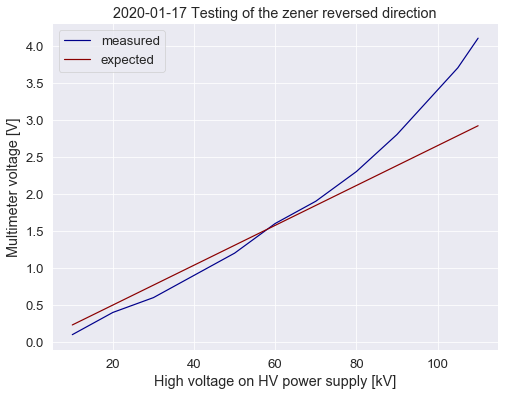

In [37]:
# plots
sns.set(font_scale=1.5, context="paper")
fig, ax = plt.subplots(figsize=(8,6))
plt.title("2020-01-17 Testing of the zener reversed direction")
plt.plot(V_HV, V_Voltmeter, label='measured', color='darkblue')
plt.plot(V_HV, V_expected, label='expected', color='darkred')
_ = plt.xlabel('High voltage on HV power supply [kV]')
_ = plt.ylabel('Multimeter voltage [V]')
_ = plt.legend(loc='best')

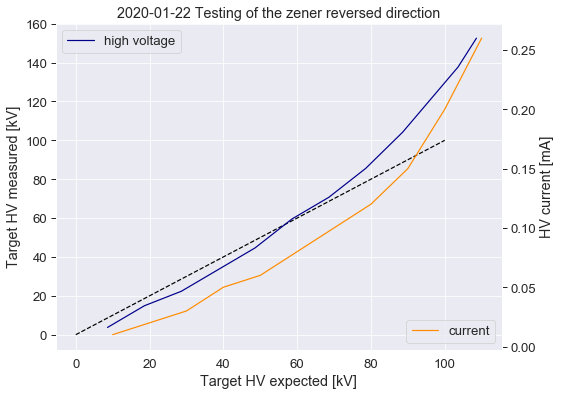

In [39]:
# plots
sns.set(font_scale=1.5, context="paper")
fig, ax = plt.subplots(figsize=(8,6))
plt.title("2020-01-22 Testing of the zener reversed direction")
# plt.plot(V_HV, , label='expected', color='darkred')
plt.plot([0, 100], [0, 100], '--', color='black')
plt.plot(np.asarray(V_HV)-1.4, V_meas_target, label='high voltage', color='darkblue')
_ = plt.xlabel('Target HV expected [kV]')
_ = plt.ylabel('Target HV measured [kV]')
_ = plt.legend(loc='best')

ax2 = ax.twinx()

# Turns off grid on the secondary (right) Axis.
ax2.grid(False)
ax2.plot(V_HV, I_HV, label='current', color='darkorange')
_ = plt.legend(loc='lower right')

_ = plt.ylabel('HV current [mA]')
